In [1]:
from model import OrientationWei
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
model = OrientationWei()

Try out the likelihood function for a few different $m$s , These are in the sensoryt space

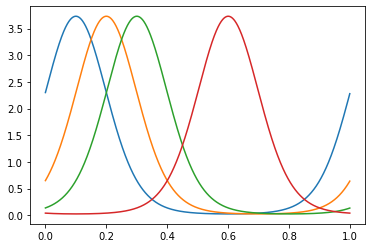

In [3]:
x_rep = model.rep_grid
plt.plot(x_rep, np.squeeze(model.rep_likelihood([.1, .2, .3, .6], x_rep, .1)).T)

Check that if we convert a prior distribution in stimulus space, we get a uniform in representational space

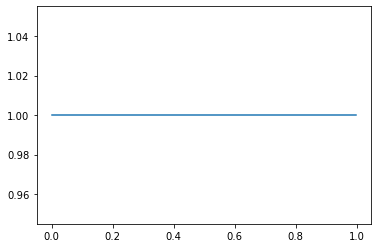

In [4]:
x_stim = model.stim_grid
prior = model.prior(x_stim)

plt.plot(*model.stim2rep(x_stim, prior))

Check that if we convert a uniform distribution to stimulus space, we get back the prior

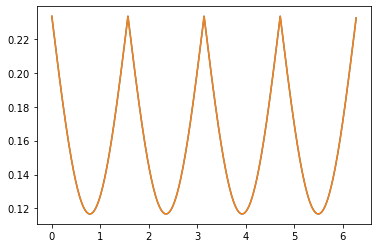

In [5]:
x_rep = model.rep_grid
prior = np.ones_like(x_rep)

plt.plot(*model.rep2stim(x_rep, prior))

plt.plot(model.stim_grid_, model.prior(model.stim_grid_))

Go through $m$ and see what is the best estimate of $F^{-1}(\widetilde{\theta})$

Text(0, 0.5, '$\\hat{\\theta}_{L_2}(m)$')

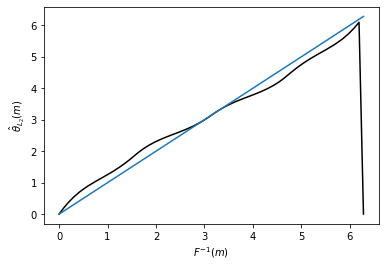

In [11]:
x_rep = np.linspace(1e-6, 1-1e-6)

x_stim = model.rep2stim(x_rep)

# Simply plotting the posterior by a subject having a given representation with all possible representations.
# One value for one m
plt.plot(x_stim, np.squeeze(model.subject_estimate_theta(x_rep, 2.)), c='k')
plt.plot([0, 2*np.pi], [0,2*np.pi])
plt.xlabel(r'$F^{-1}(m)$')
plt.ylabel(r'$\hat{\theta}_{L_2}(m)$')

Plot Subject likelihood $K(F(\theta_0), \widetilde{\theta})$ and $\mathcal{L}_{\theta_0}(\widetilde{\theta})$ for 

$\theta_0 = 0.3\pi$ 


$\mathcal{L}_{\theta_0}(\widetilde{\theta})$ is wider than $K(m, \widetilde{\theta})$, since there is both uncertainty of the subject about which $\theta$ caused $m$, but also uncertainty due to the fact that, even though we know $\theta_0$, we don't know which $m$ it led to in the subject.


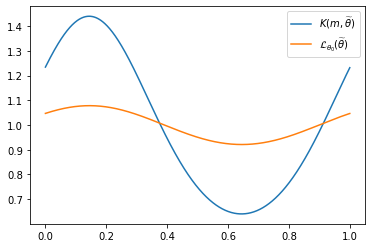

In [13]:
# This graph is s abit misleading becvause the same theta0 
# can have multiple m's but here one to one mapping is taken 
# and direct conversiuon is done for first plot.
# The second plot assumes this variableness in m

theta0 = .3 * np.pi
m = model.stim2rep(theta0)
sigma_rep = .25

x_rep = model.rep_grid

plt.plot(x_rep, np.squeeze(model.rep_likelihood(m, x_rep, sigma_rep, norm=False)), label=r'$K(m, \widetilde{\theta})$')
plt.plot(x_rep, np.squeeze(model.model_likelihood(theta0, sigma_rep)), label=r'$\mathcal{L}_{\theta_0}(\widetilde{\theta})$')

plt.legend()

Plot average estimate of the subject $\langle {\hat{\theta}_{L_2}}_{\theta_0} \rangle$ versus the actual $\theta_0$

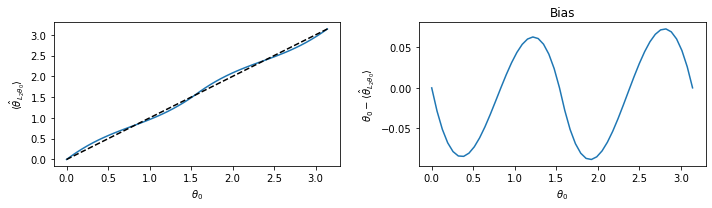

In [14]:
theta0 = np.linspace(0.0, np.pi)
sigma_rep = .2

plt.subplot(121)

# Average posterior acc to theory
plt.title('')
plt.plot(theta0, model.model_estimate_theta(theta0, sigma_rep))
plt.plot([0, np.pi], [0, np.pi], c='k', ls='--')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\langle {\hat{\theta}_{L_2}}_{\theta_0} \rangle$')

# average bias acc to theory
plt.subplot(122)
bias = np.squeeze(theta0) - np.squeeze(model.model_estimate_theta(theta0, sigma_rep))
plt.plot(theta0, bias)

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_0 - \langle {\hat{\theta}_{L_2}}_{\theta_0} \rangle$')
plt.title('Bias')
plt.gcf().set_size_inches(10, 3)
plt.tight_layout()

In [15]:
def value_function1(x):
    return (20-19*np.abs(np.sin(2*x)))

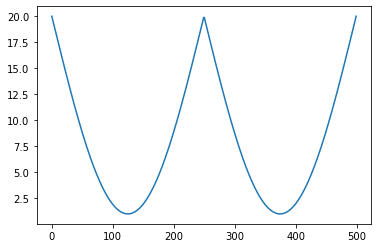

In [16]:
x = np.linspace(0,np.pi, 500)
plt.plot(value_function1(x))

In [17]:
# def value_function2(x):
# 
    # return (x % (.25*np.pi) * np.sign((x // .5*np.pi))) * ((x // (.25*np.pi) % 2)*2-1)

In [18]:
def get_value_dist(x_stim, p_stim, value_function, bins=20):
    p_stim = np.squeeze(p_stim)
    dx = x_stim[..., 1:] - x_stim[..., :-1]
    # print(dx)
    p_mass = ((p_stim[..., 1:] + p_stim[..., :-1]) / 2) * dx
    x_value = value_function((x_stim[:1] + x_stim[:-1])/2.)
    h, bins = np.histogram(x_value, bins=20, weights=p_mass, density=True)
    
    return x_value
    #return (bins[1:]+bins[:-1]) / 2, h


(array([286., 124.,  96.,  84.,  76.,  72.,  68.,  64.,  68.,  61.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

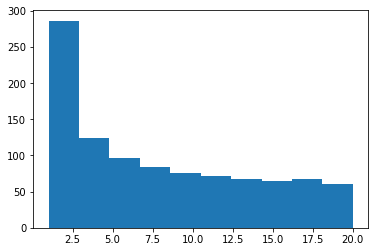

In [19]:
plt.hist(get_value_dist(model.stim_grid, model.prior(model.stim_grid), value_function1))

In [23]:
from scipy import interpolate
theta0 = .2*np.pi
sigma_rep = .1

def plot_value_distribution(theta0=.2*np.pi, sigma_rep=.15):
    x_rep = model.rep_grid
    p_rep = model.model_likelihood(theta0, sigma_rep)
    x_stim, p_stim = model.rep2stim(x_rep, p_rep)

    x_value, p_value = get_value_dist(x_stim, p_stim, value_function1)

    plt.subplot(131)
    plt.plot(x_stim, np.squeeze(p_stim))
    plt.axvline(theta0, c='k', ls='--')
    plt.title('Likelihood of subject\'s perceptual estimate')
    plt.subplot(132)
    plt.title('Value function')
    plt.plot(x_stim, value_function1(x_stim))
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'value')
    plt.subplot(133)
    plt.plot(x_value, p_value)
    plt.xlabel('v')
    plt.ylabel(r'$\widehat{p(v)}$')


    sns.despine()
    plt.gcf().set_size_inches(14, 3)

In [24]:
plot_value_distribution(sigma_rep=.01)

ValueError: too many values to unpack (expected 2)

In [25]:
from ipywidgets import interact

In [26]:
interact(plot_value_distribution, theta0=(0, np.pi, 0.1),
 sigma_rep=(0, .25, 0.025))

interactive(children=(FloatSlider(value=0.6283185307179586, description='theta0', max=3.141592653589793), Floa…

<function __main__.plot_value_distribution(theta0=0.6283185307179586, sigma_rep=0.15)>